In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

In [14]:
# Device setting
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


In [15]:
# Define hyperparameter
NUM_CLASSES = 10
LEARNING_RATE = 0.0005
BATCH_SIZE = 64
NUM_EPOCHS = 30

In [16]:
# Set transfor to normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [17]:
# DataLoading
train_dataset = datasets.MNIST(
    '~/datasets',
    train=True,
    transform=transform,
    download=True
)
test_dataset = datasets.MNIST(
    '~/datasets',
    train=False,
    transform=transform,
    download=True
)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_dataloader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [18]:
# Data size check
data = iter(train_dataloader)
samples, labels = next(data)
print(f"number of samples: {samples.shape}")
print(f"number of labels: {labels.shape}")

number of samples: torch.Size([64, 1, 28, 28])
number of labels: torch.Size([64])


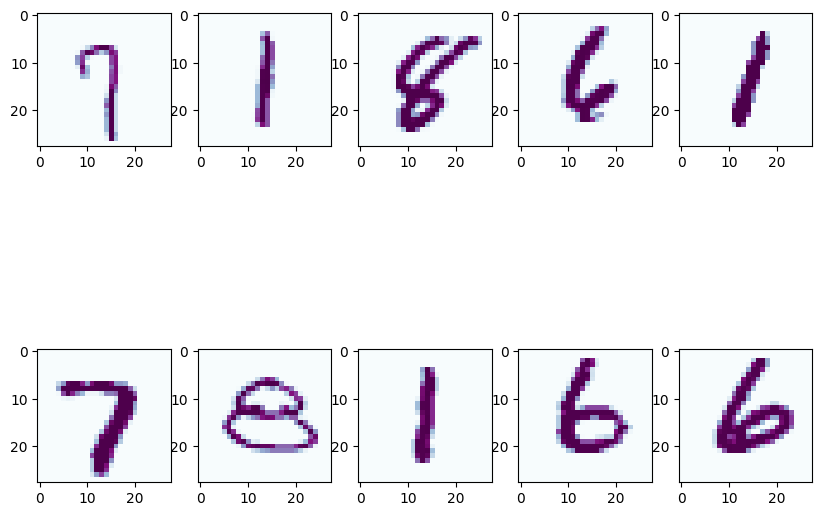

In [25]:
# Show sample data
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(samples[i][0], cmap='BuPu')
plt.show()

In [20]:
# Module set up
class CNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNClassifier, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [21]:
# Set model, criterion (loss function), and optimizer
model = CNNClassifier(num_classes=NUM_CLASSES).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [22]:
# Loss list
loss_list, test_accuracy_list = [], []

In [23]:
# Training loop
print("\nStarting training...")
for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss = 0.0

    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS}", leave=False)

    for images, labels in progress_bar:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    avg_loss = running_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {avg_loss:.4f}")
    loss_list.append(avg_loss)

    # Eval
    print("Evaluating on test data...")
    model.eval()

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_dataloader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    test_accuracy_list.append(accuracy)

print("\nFinished Training!")


Starting training...


Epoch 1/30, Loss: 0.2122
Evaluating on test data...
Test Accuracy: 98.10%


Epoch 2/30, Loss: 0.0602
Evaluating on test data...
Test Accuracy: 98.56%


Epoch 3/30, Loss: 0.0418
Evaluating on test data...
Test Accuracy: 98.96%


Epoch 4/30, Loss: 0.0329
Evaluating on test data...
Test Accuracy: 99.01%


Epoch 5/30, Loss: 0.0261
Evaluating on test data...
Test Accuracy: 99.07%


Epoch 6/30, Loss: 0.0205
Evaluating on test data...
Test Accuracy: 98.99%


Epoch 7/30, Loss: 0.0174
Evaluating on test data...
Test Accuracy: 98.96%


Epoch 8/30, Loss: 0.0131
Evaluating on test data...
Test Accuracy: 98.95%


Epoch 9/30, Loss: 0.0111
Evaluating on test data...
Test Accuracy: 99.16%


Epoch 10/30, Loss: 0.0096
Evaluating on test data...
Test Accuracy: 99.15%


Epoch 11/30, Loss: 0.0083
Evaluating on test data...
Test Accuracy: 99.09%


Epoch 12/30, Loss: 0.0072
Evaluating on test data...
Test Accuracy: 99.15%


Epoch 13/30, Loss: 0.0070
Evaluating on test data...
Test Accuracy: 99.17%


Epoch 14/30, Loss: 0.0053
Evaluating on test data...
Test Accuracy: 99.15%


Epoch 15/30, Loss: 0.0052
Evaluating on test data...
Test Accuracy: 99.21%


Epoch 16/30, Loss: 0.0033
Evaluating on test data...
Test Accuracy: 99.04%


Epoch 17/30, Loss: 0.0043
Evaluating on test data...
Test Accuracy: 99.23%


Epoch 18/30, Loss: 0.0044
Evaluating on test data...
Test Accuracy: 99.13%


Epoch 19/30, Loss: 0.0027
Evaluating on test data...
Test Accuracy: 99.08%


Epoch 20/30, Loss: 0.0034
Evaluating on test data...
Test Accuracy: 99.24%


Epoch 21/30, Loss: 0.0035
Evaluating on test data...
Test Accuracy: 99.15%


Epoch 22/30, Loss: 0.0043
Evaluating on test data...
Test Accuracy: 99.19%


Epoch 23/30, Loss: 0.0024
Evaluating on test data...
Test Accuracy: 99.25%


Epoch 24/30, Loss: 0.0025
Evaluating on test data...
Test Accuracy: 99.30%


Epoch 25/30, Loss: 0.0024
Evaluating on test data...
Test Accuracy: 99.11%


Epoch 26/30, Loss: 0.0022
Evaluating on test data...
Test Accuracy: 99.12%


Epoch 27/30, Loss: 0.0038
Evaluating on test data...
Test Accuracy: 99.07%


Epoch 28/30, Loss: 0.0021
Evaluating on test data...
Test Accuracy: 99.19%


Epoch 29/30, Loss: 0.0023
Evaluating on test data...
Test Accuracy: 99.23%


Epoch 30/30, Loss: 0.0014
Evaluating on test data...
Test Accuracy: 99.32%

Finished Training!


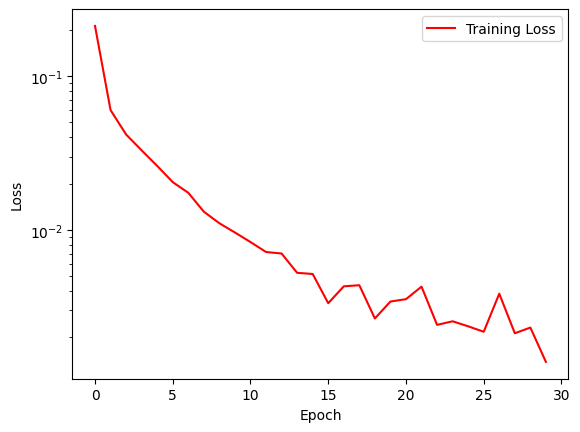

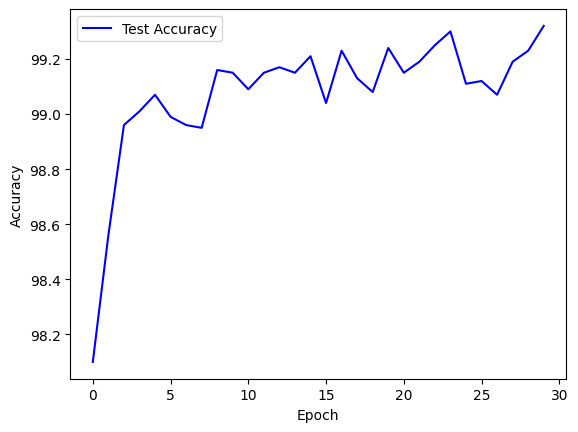

In [24]:
# Loss and Test Accuracy Plot
plt.plot(range(len(loss_list)), loss_list, label='Training Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend()
plt.show()

plt.plot(range(len(test_accuracy_list)), test_accuracy_list, label='Test Accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()